# Apple stock Price Analysis

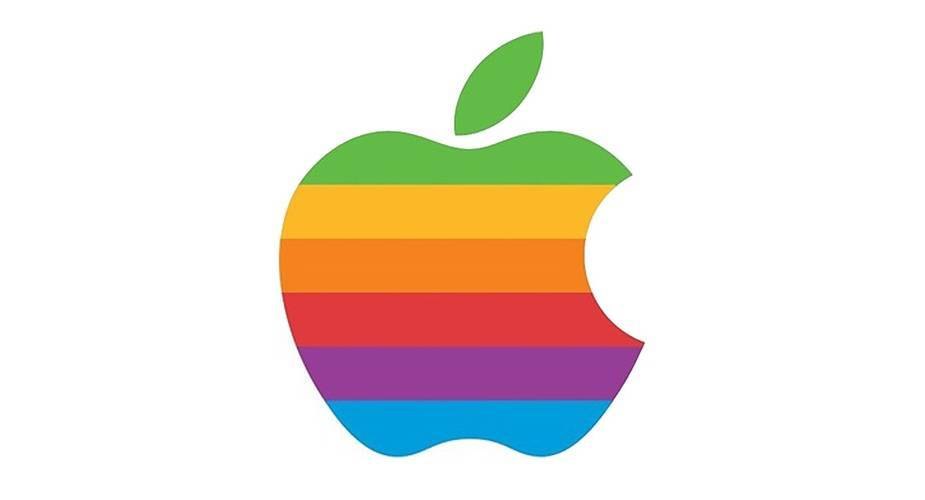

Apple Inc. is an American multinational technology company that specializes in consumer electronics, computer software, and online services. Apple is the world's largest technology company by revenue (totaling $274.5 billion in 2020) and, since January 2021, the world's most valuable company. As of 2021, Apple is the world's fourth-largest PC vendor by unit sales, and fourth-largest smartphone manufacturer It is one of the Big Five American information technology companies, along with Amazon, Google, Microsoft, and Facebook.

## Data cleaning

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
df = pd.read_csv('AAPL.csv')

In [2]:
df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100600  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095352  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088353  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090540   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.093165   73449600

In [3]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
10267  2021-09-01  152.830002  154.979996  152.339996  152.509995  152.509995   
10268  2021-09-02  153.869995  154.720001  152.399994  153.649994  153.649994   
10269  2021-09-03  153.759995  154.630005  153.089996  154.300003  154.300003   
10270  2021-09-07  154.970001  157.259995  154.389999  156.690002  156.690002   
10271  2021-09-08  156.979996  157.039993  153.979996  155.110001  155.110001   

         Volume  
10267  80313700  
10268  71115500  
10269  57808700  
10270  82278300  
10271  74347200

In [4]:
df.describe()

Open          High           Low         Close     Adj Close  \
count  10272.000000  10272.000000  10272.000000  10272.000000  10272.000000   
mean      12.006819     12.134860     11.877629     12.011191     11.420584   
std       25.111332     25.388548     24.833693     25.123982     24.816645   
min        0.049665      0.049665      0.049107      0.049107      0.038490   
25%        0.276786      0.284375      0.270089      0.276964      0.232579   
50%        0.456451      0.464286      0.446987      0.455357      0.378405   
75%       12.687857     12.825715     12.579018     12.687143     10.893390   
max      156.979996    157.259995    154.389999    156.690002    156.690002   

             Volume  
count  1.027200e+04  
mean   3.353832e+08  
std    3.404297e+08  
min    0.000000e+00  
25%    1.273552e+08  
50%    2.233742e+08  
75%    4.177250e+08  
max    7.421641e+09

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10272 non-null  object 
 1   Open       10272 non-null  float64
 2   High       10272 non-null  float64
 3   Low        10272 non-null  float64
 4   Close      10272 non-null  float64
 5   Adj Close  10272 non-null  float64
 6   Volume     10272 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 561.9+ KB


Date column is not in correct format

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
type(df.loc[0,'Date'])

pandas._libs.tslibs.timestamps.Timestamp

Null values?

In [7]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There's no null values. It's great.

There's one column seems to be redundant, it's **Adj Close** and I need to inspect it

In [8]:
df['Adj Close'].unique()

array([1.00600000e-01, 9.53520000e-02, 8.83530000e-02, ...,
       1.54300003e+02, 1.56690002e+02, 1.55110001e+02])

This column can be easily droped

In [9]:
df.drop(columns='Adj Close', inplace=True)

In [10]:
df.set_index("Date", inplace=True) #  Setting the 'Date' column as index

In [11]:
df.head()

Open      High       Low     Close     Volume
Date                                                         
1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600

In [12]:
apple_df = df.drop(columns='Volume')
volume = df['Volume']

## Data visualizations

In [13]:
fig = make_subplots(rows=3, cols=1,subplot_titles=['Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=apple_df.index, y=apple_df['Open'], name='Open',
                        line=dict(color='deepskyblue')),row=1, col=1)

fig.add_trace(go.Scatter(x=apple_df.index, y=apple_df['High'], name='High',
                        line=dict(color='salmon')),row=2,col=1)

fig.add_trace(go.Scatter(x=apple_df.index, y=apple_df['Low'], 
                         name='Low',line=dict(color='lightgreen')),row=3, col=1)

fig.update_layout(showlegend=False,title_text="OVERALL APPLE STOCKS", title_x=0.5,
                  height=1200, width=800,
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="black"
))

General tendency is that stocks are increasing

## Analysis years between 1980 and 2000

In [14]:
years_1980_2000 = apple_df[apple_df.index.year < 2000]

fig = make_subplots(rows=3, cols=1,subplot_titles=['Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=years_1980_2000.index, y=years_1980_2000['Open'], mode='lines', 
                         line=dict(color='deepskyblue')), row=1, col=1)

fig.add_trace(go.Scatter(x=years_1980_2000.index, y=years_1980_2000['High'], mode='lines',
                        line=dict(color='salmon')), row=2, col=1)

fig.add_trace(go.Scatter(x=years_1980_2000.index, y=years_1980_2000['Low'], mode='lines',
                        line=dict(color='lightgreen')), row=3, col=1)


fig.update_layout(showlegend=False,title_text="APPLE STOCKS IN YEARS 1980 - 1999 ", title_x=0.5,
                  height=1200, width=800,
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="black"
))

There's considerable increase at the beggining of 1999 

## Years between 2000 and 2010

In [15]:
years_2000_2010 =  apple_df[(apple_df.index.year <= 2010) & (apple_df.index.year >= 2000)]


fig = make_subplots(rows=3, cols=1,subplot_titles=['Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=years_2000_2010.index, y=years_2000_2010['Open'], mode='lines', 
                         line=dict(color='deepskyblue')), row=1, col=1)

fig.add_trace(go.Scatter(x=years_2000_2010.index, y=years_2000_2010['High'], mode='lines',
                        line=dict(color='salmon')), row=2, col=1)

fig.add_trace(go.Scatter(x=years_2000_2010.index, y=years_2000_2010['Low'], mode='lines',
                        line=dict(color='lightgreen')), row=3, col=1)


fig.update_layout(showlegend=False,title_text="APPLE STOCKS IN YEARS 2000-2010 ", title_x=0.5,
                  height=1200, width=800,
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="black"
))

Pattern is quite clear - it seems that at the **end of every decade** Apple stocks have an increasing tendention

In [16]:
years_after_2010 =  apple_df[apple_df.index.year > 2010]


fig = make_subplots(rows=3, cols=1,subplot_titles=['Open', 'High', 'Low'])

fig.add_trace(go.Scatter(x=years_after_2010.index, y=years_after_2010['Open'], mode='lines', 
                         line=dict(color='deepskyblue')), row=1, col=1)

fig.add_trace(go.Scatter(x=years_after_2010.index, y=years_after_2010['High'], mode='lines',
                        line=dict(color='salmon')), row=2, col=1)

fig.add_trace(go.Scatter(x=years_after_2010.index, y=years_after_2010['Low'], mode='lines',
                        line=dict(color='lightgreen')), row=3, col=1)


fig.update_layout(showlegend=False,title_text="APPLE STOCKS IN YEARS 2011 - NOW ", title_x=0.5,
                  height=1200, width=800,
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="black"
))

From visualizations above there's some pattern - **stocks have considerable increase at the end of the every decade**

## Volume analysis

What is volume? In simple words it's number of shares of a security traded during a given period of time

In [17]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=volume.index, y=volume.values, 
                         line=dict(color='plum')))

fig.update_layout(showlegend=False,title_text=" OVERALL VOLUME ", title_x=0.5,
                  height=800, width=600,
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="black"
))

## Volume in different decades

In [18]:
volume_1980_1999 = volume[volume.index.year < 2000]

fig = go.Figure()
fig.add_trace(go.Scatter(x=volume_1980_1999.index, y=volume_1980_1999.values,
                        line = dict(color='plum')))

fig.update_layout(showlegend=False,title_text="VOLUME IN YEARS 1980-1999", title_x=0.5,
                  height=800, width=600,
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="black"
))

From the scatter plot above it's clear vivisble that the biggest peaks of interest in Apple stocks was in:

* September 1983
* August 1997

In [19]:
volume_2000_2010 = volume[(volume.index.year >= 2000) & (volume.index.year <= 2010)]

fig = go.Figure()
fig.add_trace(go.Scatter(x=volume_2000_2010.index, y=volume_1980_1999.values,
                        line = dict(color='plum')))

fig.update_layout(showlegend=False,title_text="VOLUME IN YEARS 2000-2010", title_x=0.5,
                  height=800, width=600,
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="black"
))

The biggest peak of volume is in September 2000, then we can see two smaller in January 2007 and January 2008

In [20]:
volume_2010_now = volume[volume.index.year > 2010]

fig = go.Figure()
fig.add_trace(go.Scatter(x=volume_2010_now.index, y=volume_2010_now.values,
                        line = dict(color='plum')))

fig.update_layout(showlegend=False,title_text="VOLUME IN YEARS 2010-NOW", title_x=0.5,
                  height=800, width=600,
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="black"
))

The biggest interest in apple actions was in January 2011 then it started to decrease

**Conclusions:**

There's some patterns in apple stocks and volume history, it seems to be the best idea to buy stock at the begging of the decade (for example now) and then sell it at the end of the next. But there's a lot of time, anyway apple stocks generally have increasing tendency so maybe You should consider buying it...